In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### a) Implement the above mazes and show them as an image-plot

In [36]:
mazes = []

mazes.append("""####################
#XX                #
#XX                #
#################  #
#               #  #
#               #  #
#       #       #  #
#       #       #  #
#   ##########  #  #
#            #     #
#            #     #
#   #    ########  #
#   #    #         #
#   #    #         #
#   #    ###########
#   #              #
#   #              #
#   #              #
#   #              #
####################""")

mazes.append("""####################
#                  #
#                  #
#################  #
#               #  #
#               #  #
#       #       #  #
#       #       #  #
#   ##########  #  #
#            #     #
#            #     #
#   #    ########  #
#   #    #         #
#   #    #         #
#   #    ###########
#   #              #
#   #              #
#   #              #
#XXX#              #
####################""")

mazes.append("""####################
#X                 #
#X                 #
#################  #
#               #  #
#               #  #
#       #       #  #
#       #       #  #
#   ##########  #  #
#            #     #
#            #     #
#   #    ########  #
#   #    #         #
#   #    #         #
#   #    ###########
#   #             X#
#   #             X#
#   #             X#
#   #             X#
####################""")

mazes.append("""####################
#X                 #
#                  #
#################  #
#X             X#  #
#               #  #
#       #       #  #
#       #       #  #
#   ##########  #  #
#           X#     #
#            #     #
#   #    ########  #
#   #    #X        #
#   #    #         #
#   #    ###########
#   #              #
#   #              #
#   #              #
#  X#             X#
####################""")

for i in range(len(mazes)):
    mazes[i] = np.array([list(line) for line in mazes[i].splitlines()])
    
mx, my = mazes[0].shape

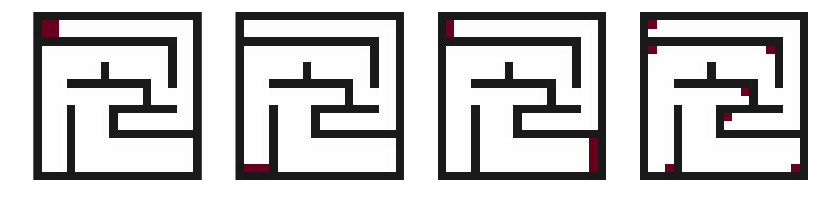

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for ax, maze in zip(axes, mazes):
    maze_img = np.zeros_like(maze, dtype=float)
    for index, symbol in np.ndenumerate(maze):
        if symbol == ' ':
            maze_img[index] = 0.5
        elif symbol == '#':
            maze_img[index] = 1
        elif symbol == 'X':
            maze_img[index] = 0
    ax.imshow(maze_img, interpolation='none', cmap='RdGy')
    ax.axis('off')

#### b) Implement a transition model

In [38]:
# Each state is modeled as a position (x, y) in the maze. The states are indexed continuously from (0, 0) to (mx, my). 
def state_to_index(state):
    return state[0] + mx * state[1]

In [58]:
transition_models = []
for maze in mazes:
    transition_model = np.zeros((mx*my, mx*my, 4))  # dimensions: new state, old state, actions
    for (x, y), symbol in np.ndenumerate(mazes[0]):
        if symbol != '#':  # the probability to transition from a wall state is always zero
            old_state = (x, y)
            possible_new_states = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]  # right, left, top, down
            for action_index, new_state in enumerate(possible_new_states):
                if maze[new_state] == '#': 
                    # The agent hit a wall and stays at its current position --> transition from old state into old state.
                    transition_model[state_to_index(old_state), state_to_index(old_state), action_index] = 1
                else:
                    # The agent moves to a free field --> transition from old state into new state.
                    transition_model[state_to_index(new_state), state_to_index(old_state), action_index] = 1      
    transition_models.append(transition_model)

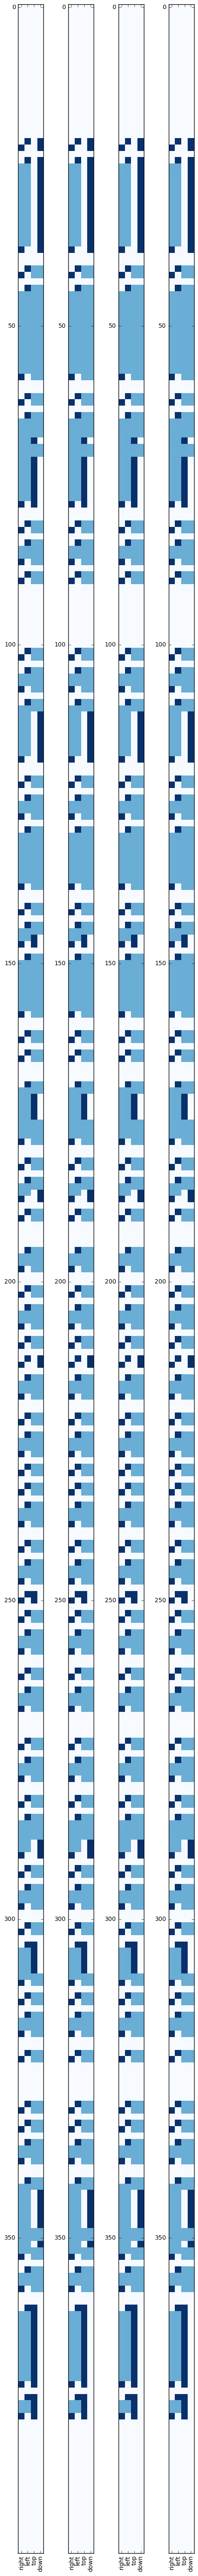

In [80]:
# The color indicates the probability to transition to the new state indexed on the vertical axis 
# by choosing the action on the horizontal axis (from any arbitrary old state). 

fig, axes = plt.subplots(1, 4, figsize=(5, 60))
for ax, transition_model in zip(axes, transition_models):
    ax.imshow(transition_model.sum(axis=1), interpolation='none', cmap='Blues')
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(['right', 'left', 'top', 'down'], rotation=90)
    
plt.tight_layout()

#### c) Compute the analytic value function

In [93]:
reward_function = np.zeros(mx*my)
for state, symbol in np.ndenumerate(mazes[0]):
    if symbol == 'X':
        reward_function[state_to_index(state)] = 1.
    else:
        reward_function[state_to_index(state)] = 0.

In [96]:
gamma = 0.9
analytic_value_function = (np.linalg.inv(np.identity(mx*my) - gamma * transition_models[0].sum(axis=2))).dot(reward_function)
analytic_value_function.shape

(400L,)

C:\Users\D068730\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\D068730\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


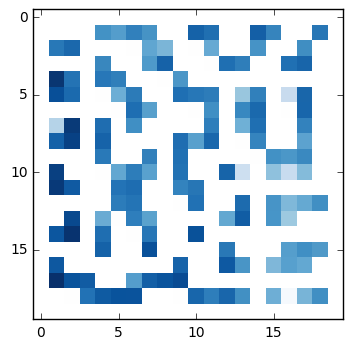

In [100]:
plt.imshow(np.log(analytic_value_function.reshape(mx, my)), interpolation='none', cmap='Blues')